## Test notebook for Data Management Acceptance Test Campaign 1
This test will be executed on the Rubin Science Platform Notebook Aspect at the Interim Data Facility, initialized with Science Pipelines release w_2022_32.

### Test case LVV-T127: Verify implementation of Provide Source Detection Software

Verify that the DMS provides source detection software that can be applied to calibrated images, including both difference images and coadds. This will be verified using simulated data, but could also be done by inserting artificial sources into existing datasets.

In [1]:
from lsst.daf.butler import Butler

from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Instantiate the butler and the default DP0.2 collection:

In [2]:
config = 'dp02'
collection = '2.2i/runs/DP0.2'
butler = Butler(config, collections=collection)

#### Select a tract at random for exploration, and create a dataId for retrieving tract-level data from the Butler.

In [3]:
dataId_coadd = {'tract': 3828, 'skymap':'DC2', 'patch':43, 'band':'i'}

In [4]:
deep_coadd = butler.get('deepCoadd_calexp', dataId=dataId_coadd)

#### Select a visit/detector that contributed to the selected coadd:

In [5]:
coadd_inps = deep_coadd.info.getCoaddInputs()

In [6]:
coadd_inps.ccds.asAstropy()

id,bbox_min_x,bbox_min_y,bbox_max_x,bbox_max_y,ccd,visit,goodpix,weight,filter
,pix,pix,pix,pix,,,,,
int64,int32,int32,int32,int32,int32,int64,int32,float64,str32
433962000,0,0,4071,3999,0,433962,32207,3.7568056174453575,i_sim_1.4
678527009,0,0,4071,3999,9,678527,4862483,4.11658152012514,i_sim_1.4
678527010,0,0,4071,3999,10,678527,142036,4.11658152012514,i_sim_1.4
678527012,0,0,4071,3999,12,678527,9062219,4.11658152012514,i_sim_1.4
678527013,0,0,4071,3999,13,678527,1655361,4.11658152012514,i_sim_1.4
951282002,0,0,4071,3999,2,951282,1685117,4.378267540095977,i_sim_1.4
951282005,0,0,4071,3999,5,951282,4431277,4.378267540095977,i_sim_1.4
951282009,0,0,4071,3999,9,951282,3119823,4.378267540095977,i_sim_1.4


In [7]:
dataId_calexp = {'visit': 678527, 'detector': 12}

#### Retrieve the Source and DIASource catalogs.

In [8]:
src = butler.get('src', dataId=dataId_calexp)
dia_src = butler.get('goodSeeingDiff_diaSrc', dataId=dataId_calexp)

In [9]:
src.asAstropy()[0:10]

id,coord_ra,coord_dec,parent,calib_detected,calib_psf_candidate,calib_psf_used,calib_psf_reserved,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psf_instFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,deblend_peak_center_x,deblend_peak_center_y,deblend_peakId,deblend_nPeaks,deblend_parentNPeaks,sky_source,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,slot_Centroid_xErr,base_SdssCentroid_yErr,slot_Centroid_yErr,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_LocalBackground_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMomentsDebiased_flag_badCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_LocalBackground_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMomentsDebiased_flag_badCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_LocalBackground_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMomentsDebiased_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_LocalBackground_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMomentsDebiased_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_LocalBac

In [10]:
dia_src.asAstropy()[0:10]

id,coord_ra,coord_dec,parent,flags_negative,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_x,base_PeakCentroid_y,base_PeakCentroid_flag,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_SdssCentroid_flag_badError,ip_diffim_NaiveDipoleCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PeakLikelihoodFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,base_SdssCentroid_flag_badInitialCentroid,base_SdssShape_flag_badCentroid,slot_Centroid_flag,ip_diffim_NaiveDipoleCentroid_pos_flag,slot_Centroid_pos_flag,ip_diffim_NaiveDipoleCentroid_neg_flag,slot_Centroid_neg_flag,ip_diffim_NaiveDipoleCentroid_x,slot_Centroid_x,ip_diffim_NaiveDipoleCentroid_y,slot_Centroid_y,ip_diffim_NaiveDipoleCentroid_xErr,slot_Centroid_xErr,ip_diffim_NaiveDipoleCentroid_yErr,slot_Centroid_yErr,ip_diffim_NaiveDipoleCentroid_pos_x,slot_Centroid_pos_x,ip_diffim_NaiveDipoleCentroid_pos_y,slot_Centroid_pos_y,ip_diffim_NaiveDipoleCentroid_pos_xErr,slot_Centroid_pos_xErr,ip_diffim_NaiveDipoleCentroid_pos_yErr,slot_Centroid_pos_yErr,ip_diffim_NaiveDipoleCentroid_neg_x,slot_Centroid_neg_x,ip_diffim_NaiveDipoleCentroid_neg_y,slot_Centroid_neg_y,ip_diffim_NaiveDipoleCentroid_neg_xErr,slot_Centroid_neg_xErr,ip_diffim_NaiveDipoleCentroid_neg_yErr,slot_Centroid_neg_yErr,base_SdssShape_xx,slot_Shape_xx,base_SdssShape_yy,slot_Shape_yy,base_SdssShape_xy,slot_Shape_xy,base_SdssShape_xxErr,slot_Shape_xxErr,base_SdssShape_yyErr,slot_Shape_yyErr,base_SdssShape_xyErr,slot_Shape_xyErr,base_SdssShape_x,slot_Shape_x,base_SdssShape_y,slot_Shape_y,base_SdssShape_instFlux,slot_Shape_instFlux,base_SdssShape_instFluxErr,slot_Shape_instFluxErr,base_SdssShape_psf_xx,slot_PsfShape_xx,slot_Shape_psf_xx,base_SdssShape_psf_yy,slot_PsfShape_yy,slot_Shape_psf_yy,base_SdssShape_psf_xy,slot_PsfShape_xy,slot_Shape_psf_xy,base_SdssShape_instFlux_xx_Cov,slot_Shape_instFlux_xx_Cov,base_SdssShape_instFlux_yy_Cov,slot_Shape_instFlux_yy_Cov,base_SdssShape_instFlux_xy_Cov,slot_Shape_instFlux_xy_Cov,base_SdssShape_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,base_SdssShape_flag_unweightedBad,base_GaussianFlux_flag_badShape_unweightedBad,slot_Shape_flag_unweightedBad,base_SdssShape_flag_unweighted,base_GaussianFlux_flag_badShape_unweighted,slot_Shape_flag_unweighted,base_SdssShape_flag_shift,base_GaussianFlux_flag_badShape_shift,slot_Shape_flag_shift,base_SdssShape_flag_maxIter,base_GaussianFlux_flag_badShape_maxIter,slot_Shape_flag_maxIter,base_SdssShape_flag_psf,base_GaussianFlux_flag_badShape_psf,slot_Shape_flag_psf,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_12_0_instFlux,slot_ApFlux_instFlux,base_CircularApertureFlux_12_0_instFluxErr,slot_ApFlux_instFluxErr,base_Circ

These look well-formed, and contain the expected measurements, so we conclude that the source detection software functioned as expected.

#### Demonstrate some of the measurements in the catalogs

In [11]:
# Set up some plotting defaults:

params = {'axes.labelsize': 24,
          'font.size': 20,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [7, 7],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)


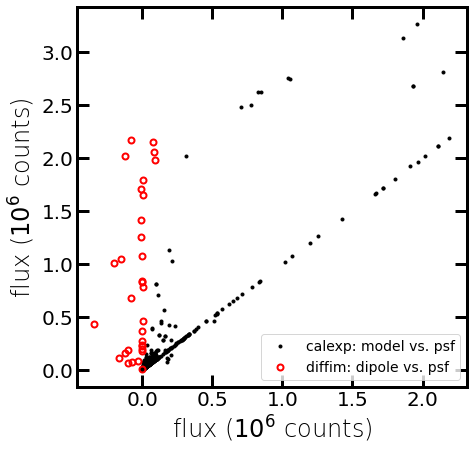

In [12]:
plt.plot(src['slot_PsfFlux_instFlux']/1e6, src['slot_ModelFlux_instFlux']/1e6, 'k.', label='calexp: model vs. psf')
plt.plot(dia_src['base_PsfFlux_instFlux']/1e6, dia_src['ip_diffim_DipoleFit_instFlux']/1e6, 'ro',
         markeredgewidth=2, fillstyle='none', label='diffim: dipole vs. psf')
plt.xlabel('flux ($10^6$ counts)')
plt.ylabel('flux ($10^6$ counts)')
plt.legend(loc = 'lower right')
plt.show()

As expected, the majority of objects have similar flux measurements in model vs. PSF from the PVIs (i.e., they are near the 1:1 line). Most measurements of difference image flux are near zero, with some excursions to positive or negative.

#### Compare flux measurements to the DC2 truth table.

In [13]:
truth_sum = butler.get('truth_summary', dataId={'tract': 3828, 'skymap':'DC2'})

In [14]:
sc_src = SkyCoord(ra=src['coord_ra']*u.radian, dec=src['coord_dec']*u.radian)
sc_truth = SkyCoord(ra=truth_sum.ra.values*u.deg, dec=truth_sum.dec.values*u.deg)

In [15]:
idx, sep2d, dist3d = sc_src.match_to_catalog_sky(sc_truth)

In [16]:
# Consider matches within 0.5" to be "good" matches:
okmch = (sep2d.arcsec < 0.5)

In [17]:
# Apply the local photocalib and the aperture correction to model fluxes:
model_flux = src[okmch]['base_LocalPhotoCalib']*src[okmch]['slot_ModelFlux_apCorr']*src[okmch]['slot_ModelFlux_instFlux']

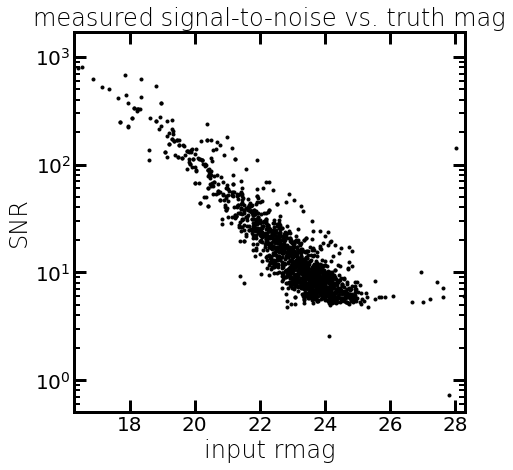

In [18]:
plt.plot(truth_sum.mag_r.values[idx[okmch]], src[okmch]['slot_ModelFlux_instFlux']/src[okmch]['slot_ModelFlux_instFluxErr'], 'k.')
plt.xlabel('input rmag')
plt.ylabel('SNR')
#plt.ylim(0, 4)
plt.semilogy()
plt.xlim(16.3, 28.3)
plt.title('measured signal-to-noise vs. truth mag')
plt.show()

This depth looks reasonable -- 5-sigma detection seems to reach ~24th mag.

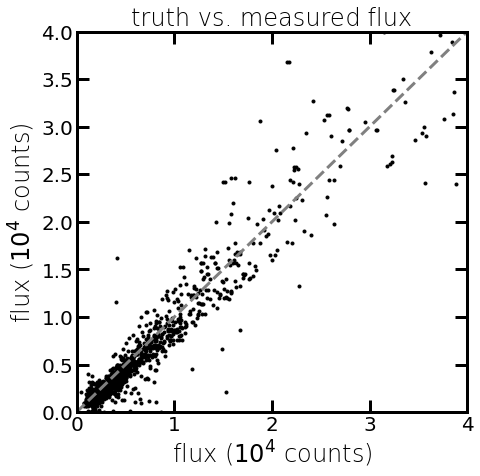

In [19]:
plt.plot(model_flux/1e4, truth_sum.flux_i.values[idx[okmch]]/1e4, 'k.')
plt.xlabel('flux ($10^4$ counts)')
plt.ylabel('flux ($10^4$ counts)')
plt.ylim(0, 4)
plt.xlim(0, 4)
plt.plot(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1), linestyle='--', color='gray')
plt.title('truth vs. measured flux')
plt.show()

The agreement looks good, so we conclude that the source detection and measurement software in the LSST Science Pipelines is doing a reasonably good job.